# Anatomy of a learning algorithm

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Anatomy-of-a-learning-algorithm" data-toc-modified-id="Anatomy-of-a-learning-algorithm-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Anatomy of a learning algorithm</a></span><ul class="toc-item"><li><span><a href="#Loss" data-toc-modified-id="Loss-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loss</a></span></li><li><span><a href="#Cost-Function" data-toc-modified-id="Cost-Function-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Cost Function</a></span></li><li><span><a href="#Optimization-function" data-toc-modified-id="Optimization-function-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Optimization function</a></span><ul class="toc-item"><li><span><a href="#Normal-Equations" data-toc-modified-id="Normal-Equations-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Normal Equations</a></span></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Gradient Descent</a></span></li><li><span><a href="#Batch-Gradient-descent" data-toc-modified-id="Batch-Gradient-descent-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Batch Gradient descent</a></span></li><li><span><a href="#Stochastic-Gradient-descent" data-toc-modified-id="Stochastic-Gradient-descent-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Stochastic Gradient descent</a></span></li><li><span><a href="#Intuition-on-gradient-descent" data-toc-modified-id="Intuition-on-gradient-descent-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Intuition on gradient descent</a></span></li><li><span><a href="#Intuition-(cont.)" data-toc-modified-id="Intuition-(cont.)-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Intuition (cont.)</a></span></li></ul></li><li><span><a href="#Probabilities" data-toc-modified-id="Probabilities-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Probabilities</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Parametric-vs.-non-parametric" data-toc-modified-id="Parametric-vs.-non-parametric-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Parametric vs. non-parametric</a></span></li></ul></li></ul></div>

## Loss

[Partially from here](https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0)

All the algorithms in machine learning rely on minimizing or maximizing a function, which we call “objective function”. The group of functions that are minimized are called “loss functions”. A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. A most commonly used method of finding the minimum point of function is “gradient descent”.

To perform supervised learning, we must decide how we’re going to represent the objective function $h$ in a computer. As an initial choice, let’s say we decide to approximate $y$ as a linear function of $x$, which is the simplest approach, followed by the _vanilla linear regression_:

$$ h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 $$

Here, the $\theta_i$’s are the parameters (also called weights) parameterizing the space of linear functions mapping from $X$ to $Y$. We can rewrite the expression above as:

$$ h(x) = \sum_{i=0}^n \theta_i x_i = \theta^T x $$

The training examples and the target variable may also be represented as a matrix:

$$ X = \begin{bmatrix} (x^{(1)})^T \\
(x^{(2)})^T \\
\vdots \\
(x^{(m)})^T \\
\end{bmatrix}  \hspace{1cm} \vec{y} = \begin{bmatrix} y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)} \\
\end{bmatrix} $$

Now, our **goal** is to find the parameters $\theta$. 

Given that we determined that the **loss** is a measure of how good is our approximation to $y$, it should be defined as (for a given sample or measure of $x^{(i)}$:

$$ \text{loss} \approx h_\theta(x^{(i)}) - y^{(i)} $$

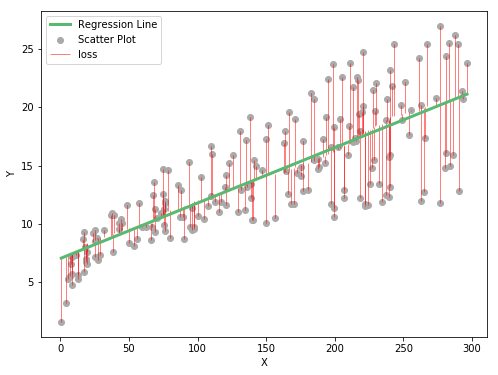

In [11]:
# Plotting Values and Regression Line
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections as mc
from sklearn import linear_model

# Read the data
url="http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv"
adv = pd.read_csv(url)
data = pd.DataFrame({'X': list(adv.TV.values), 'Y': list(adv.sales)}).\
            sort_values(by=['X'])
X = pd.DataFrame(data.X)
Y = pd.DataFrame(data.Y)

max_x = np.max(X)
min_x = np.min(X)

# Fit a linear regression to the sample entries
lm = linear_model.LinearRegression()
lm.fit(X, Y)
t0 = lm.intercept_
t1 = lm.coef_[0]

# Calculating line values x and y
x = np.linspace(min_x, max_x, data.X.shape[0])
y = t0 + t1 * x

# Ploting the regression Line and the scattered points
ax = plt.figure(figsize=(8,6)).gca()
plt.scatter(data.X, data.Y, c='#aaaaaa', label='Scatter Plot')
plt.plot(x, y, color='#58b970', lw=3, label='Regression Line')

lines = [[(X.iloc[i,0], Y.iloc[i,0]), 
          (X.iloc[i,0], y[i])] 
         for i in range(X.shape[0])]
lc = mc.LineCollection(lines, color="red", lw=0.5, label="loss")
ax.add_collection(lc)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show();

## Cost Function

We define the **cost function** as a function of the parameters that we need to learn $\theta$, as:

$$ J(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 $$

You might find this equation with a similar notation where $\beta$ is used instead of $\theta$.

## Optimization function

Since we want to choose $\theta$ so as to minimize $J(\theta)$ we need an algorithm (or function) that will search throughout all possible values of $\theta$ to find those that **minimize the cost**.

### Normal Equations

First way of solving the minimization problem for $\theta$ is to use a direct computation of them, after developing a little bit the cost function equation in matix form, which leads to a single expression like this:

$$ \theta = (X^T X)^{-1} X^T \vec{y} $$

### Gradient Descent

Supose that instead of developing a lot of matrix algebra we think of an algorithm that iteratively **searches** for the optimal values of $\theta$, like this:

1. start with some random values for $\theta$
2. for each of the parameters $j = 1, ..., n$, and a given example:
    1. update $\theta_j$ proportionally to the loss

This can also be expressed as:

$$ \theta_j := \theta_j - \alpha \Big( y^{(i)} - h_{\theta}(x^{(i)}) \Big) x_{j}^{(i)} $$

The new parameter $\alpha$ is the _learning rate_ and controls the amount by which we update our $\theta$ proportionally to the error, and each sample ($x_{j}^{(i)}$). This update rule is called the **LMS** update rule (Least Mean Squares), and is also known as the **Widrow-Hoff** learning rule.

### Batch Gradient descent

If we execute the update rule, for every training examples in our training set, but only after it has been measured the error that all of them produce, the algorithm becomes (for every $j$):

$\text{Repeat until convergence \{} $

$ \hspace{1cm} \theta_j := \theta_j - \alpha \sum_{i=1}^{m}(y^{(i)} - h_{\theta}(x^{(i)})) \ x_{j}^{(i)} $

$\text{\}}$

### Stochastic Gradient descent

If we execute the update rule, each time we encounter a training sample in our training set, the algorithm becomes (for every $j$):

$ \text{Repeat until convergence \{} $

&nbsp;&nbsp;&nbsp;&nbsp; $ \text{for i=1 to m, \{} $

$ \hspace{1.25cm} \theta_j := \theta_j - \alpha \ (y^{(i)} - h_{\theta}(x^{(i)})) \ x_{j}^{(i)} $

&nbsp;&nbsp;&nbsp;&nbsp;$\text{\}}$

$\}$

### Intuition on gradient descent

Why the expression?

$$ (y^{(i)} - h_{\theta}(x^{(i)})) \ x_{j}^{(i)} $$

It is the result of solving the equation:

$$ \frac{\delta}{\delta \theta_j} J(\theta) $$

also known as the **gradient**, or $ \nabla J(\theta) $. The derivative is the slope of a line tangent to the curve at each point. The _curve_ is the one defined by our cost function ($J(\theta)$) 

### Intuition (cont.)

The **gradient** ($\frac{\delta}{\delta \theta_j}$) is the **slope** of the tangent of the cost function ($ J(\theta)$) at a given point. 

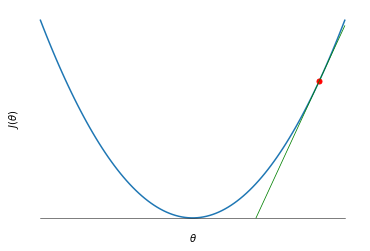

In [4]:
X = np.linspace(-3., 3., num=100)
Y = np.power(X, 2)
dx = np.linspace(.75, 3., num=100)

def y(x):
    return np.power(x, 2.0)

def m(x):
    return 2.0 * x

def yp(x, p):
    return ((m(p) * x) - (m(p) * p) + y(p))

def zero(p):
    return (m(p) * p - y(p))/m(p)

plt.box(False)
plt.yticks([])
plt.xticks([])
plt.plot(X, Y)
point = 2.5
plt.plot(X, np.zeros(X.shape[0]), color='black', lw=0.5)
plt.plot(point, np.power(point, 2.), marker='o', markersize=5, color="red")
plt.plot([zero(point), 3.],[0., yp(3., point)], 'g-', lw=0.75)
plt.xlabel(r'$ \theta $')
plt.ylabel(r'$ J( \theta ) $')
plt.show()

When that value is positive, the gradient descent equation lowers $\theta$ (because of the negative sign), indicating that the minimum of $J(\theta)$ corresponds to a lower value of $\theta$.

$$ \theta_j := \theta_j - \alpha \frac{\delta}{\delta \theta_j} J(\theta) $$

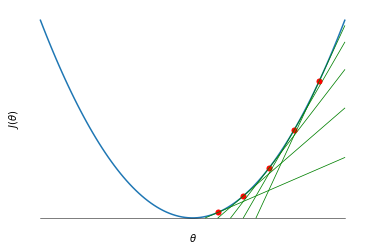

In [5]:
plt.box(False)
plt.yticks([])
plt.xticks([])
plt.plot(X, Y)
plt.plot(X, np.zeros(X.shape[0]), color='black', lw=0.5)

for point in np.arange(0.5, 3.0, 0.5):
    plt.plot(point, np.power(point, 2.), marker='o', markersize=5, color="red")
    plt.plot([zero(point), 3.],[0., yp(3., point)], 'g-', lw=0.75)

plt.xlabel(r'$ \theta $')
plt.ylabel(r'$ J( \theta ) $')
plt.show()

## Probabilities

Assume now that the actual values that we want to predict are related to our predictions via the following expression:

$$ y^{(i)} = \theta^T x^{(i)} + \epsilon^{(i)} $$

where $\epsilon^{(i)}$ is the error in our predictions, because of not having enough features, or including noise in our data, ....

If we assume that $\epsilon^{(i)}$ follows a normal distribution $ \epsilon^{(i)} \sim \mathcal{N}(0, \sigma)$, then the density of $\epsilon^{(i)}$ is given by

$$ p(\epsilon^{(i)}) = \frac{1}{\sqrt{2 \pi} \sigma} exp \Big( - \frac{(\epsilon^{(i)})^2}{2 \sigma^2} \Big) $$

...which automatically leads to assume that the other part of the expression

$$ y^{(i)} - \theta^T x^{(i)} = \epsilon^{(i)} $$

also follows a normal distribution, and its density also follows the equation from the normal distribution.

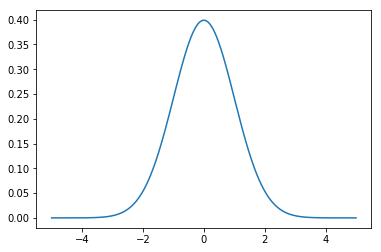

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x_axis = np.arange(-5, 5, 0.001)
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))
plt.show()

$$ p(y^{(i)} | x^{(i)};\theta) = \frac{1}{\sqrt{2 \pi} \sigma} exp \Big( - \frac{(y^{(i)} - \theta^T x^{(i)})^2}{2 \sigma^2} \Big) $$

This quantity is a function of $\vec{y}$ and $X$, for a fixed value of $\theta$. We can turn this into a function of $\theta$, and in that case it's called **likelihood**.

$$ p(\vec{y} | X; \theta) = L(\theta; X, \vec{y}) = L(\theta) $$

Given that the probabilities are independent from each other, as a basis from our assumption, we can re-write $L(\theta)$ as follows:

$$ L(\theta) = \prod_{i=1}^m p(y^{(i)} | x^{(i)};\theta) $$

How to solve the equation? We should select out values for $\theta$ so as to make the data as highly probable as possible. We should chose $\theta$ to maximize $L(\theta)$. We're in a slightly different problem here: we jumped from minimizing the cost, to maximizing the probability, according to the **maximum likelihood**.



Given that our normal distribution assumption introduces exponents, which are complicated to solve, we modify the problem, without modifying the basic principles (instead of maximizing $L(\theta)$ we maximize any strictly increasing function of $L(\theta)$.

$$ \ell(\theta) = log \ L(\theta) $$

which result, after solving the equation, in minimizing the expression:

$$ \frac{1}{2} \sum_{i=1}^{m} (y^{(i)} - \theta^T x^{(i)})^2 $$

... our original cost function. So maximizing probabilities is equivalent to minimizing the least-squares function.

## Logistic Regression

We can solve a classification problem using the same tools as in regression, but we want our approximation function $\ h_{\theta}(x)\ $ to have values within $(0, 1)$, instead of any continuous value. To do so:

$$ h_\theta(x) = g(\theta^T \ x) = \frac{1}{1 + e^{-\theta^T\ x}} $$

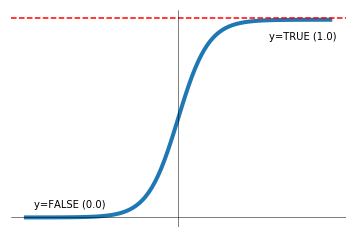

In [7]:
x = np.linspace(-10, 10, 100)
y = np.power((1. + np.exp(-x)), -1.)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.plot(x, y, lw=4)
plt.axhline(y=0.0, color='k', linestyle='-', lw=0.5)
plt.axhline(y=1.01, color='red', linestyle='--')
plt.axvline(x=0.0, color='k', linestyle='-', lw=0.5)
plt.text(6.0, 0.9, "y=TRUE (1.0)")
plt.text(-9.5, 0.05, "y=FALSE (0.0)")
plt.show();

$g(x)$ tends towards 1 as $x \to \infty$, and $g(x)$ tends towards 0 as $x \to -\infty$.

Following the logistic regression model, we can use a maximum likelihood estimator (under certain assumptions), to find the parameters we're looking for ($\theta$). Our problem will be re-stated as follows, to accomodate the probabilitic interpretation:

$ \hspace{2cm} P(y=1\ |\ x;\theta) = h_\theta(x) \\
\hspace{2cm} P(y=0\ |\ x;\theta) = 1 - h_\theta(x) $

which can also be written as:

$$ p(y\ |\ x;\theta) = (h_\theta(x))^y \ (1 - h_\theta(x))^{1-y} $$

If we solve the previous equation for $\ell (\theta)$, we will surprisingly end up in an expression called **gradient ascent**:

$$ \theta_j := \theta_j + \alpha ( y^{(i)} - h_{\theta}(x^{(i)}) ) x_{j}^{(i)} $$

Notice the sign before the $\alpha$, as we're now in a maximization problem. Notice also that in this case, $h_\theta(x^{(i)})$ is a non-linear function of $\theta^T x^{(i)}$.

## Parametric vs. non-parametric

In our original problem with linear regression we quickly realize that a straight line approach is not the optimal solution. Instead, adding a single quadratic coefficient to the equation that collects all our parameters ($\theta$) produces a better result.

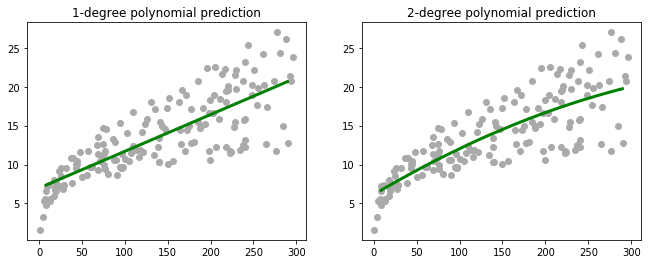

In [8]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, ShuffleSplit


def split_datasets(X, y, seed, 
                   split_test_size=0.2, 
                   validation_split=True):
    """
    Split X and y dataframes into training, test and validation datasets, using the provided random seed.
    Returns a dictionary with the datasets
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=split_test_size, random_state=seed)
    
    split = dict()
    if validation_split is True:
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=split_test_size, random_state=seed)
        split['X_val'] = X_val
        split['y_val'] = y_val

    split['X_train'] = X_train
    split['X_test'] = X_test
    split['y_train'] = y_train
    split['y_test'] = y_test

    return split

def prepare_datasets(data, features, target, 
                     seed=1024, 
                     test_size=0.2, 
                     validation_split=False):
    """
    From an input dataframe, separate features from target, and 
    produce splits (with or without validation).
    """
    X = pd.DataFrame(adv, columns=features)
    y = pd.DataFrame(adv.loc[:, target])
    split = split_datasets(X, y, seed=seed, split_test_size=test_size, validation_split=validation_split)
    return split

def xy_values(pipeline, X):
    """ Returns the x and y values sorted by X in a dataframe """
    y_pred = pipeline.predict(X)
    return pd.DataFrame({'x': list(X.values), 'y': list(y_pred)}).\
                        sort_values(by=['x'])

def polynomial_pipeline(X, y, degree):
    """
    Build a pipeline with polinomial expressions and linear regression over it.
    """
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=555)
    poly = PolynomialFeatures(degree=degree, interaction_only=False, include_bias=False)
    lm = linear_model.LinearRegression()
    pipeline = make_pipeline(poly, lm)
    pipeline.fit(X, y)
    return pipeline

split = prepare_datasets(adv, ['TV'], 'sales')
pipeline1 = polynomial_pipeline(split['X_train'], split['y_train'], degree=1)
pipeline2 = polynomial_pipeline(split['X_train'], split['y_train'], degree=2)

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
f.set_figwidth(11)

ax1.scatter(split['X_train'].values, split['y_train'].values, color='#aaaaaa')
pred1 = xy_values(pipeline1, split['X_test'])
ax1.plot(pred1.x.values, pred1.y.values, label='prediction',
         linewidth=3, color='green')
ax1.set_title('1-degree polynomial prediction')

ax2.scatter(split['X_train'].values, split['y_train'].values, color='#aaaaaa')
pred2 = xy_values(pipeline2, split['X_test'])
ax2.plot(pred2.x.values, pred2.y.values, label='prediction',
         linewidth=3, color='green')
ax2.set_title('2-degree polynomial prediction')

plt.show();

...But the challenge is that in more complicated spaces (higer number of dimensions, or in plain english, with more features involved), it would be tricky to find what is the correct polynomial degree that best fit our target variable.

This is the main reason why the choice of features is so important to ensure a proper behavior of the model.

The original structure of the optimization algorithm suggested in the regression algorithm is as follows:

1. Fit $\theta$ to minimize $\sum_i (y^{(i)}\ -\ \theta^T x^{(i)})^2$ 
2. Produce a prediction by computing $\theta^T x$.

but we could make our problem a bit more interesting if instead of focusing only in the _parameters_ of the function, we also consider that the algorithm must find additional values, not related to the function itself:

1. Fit $\theta$ to minimize $\sum_i \omega^{(i)}(y^{(i)}\ -\ \theta^T x^{(i)})^2$ 
2. Produce a prediction by computing $\theta^T x$

This new expression introduces $\omega^{(i)}$: **weights**.

This example shows how a **non-parametric** algorithm works. The traditional version of linear regression is an example of **parametric** algorithm.

Parametric means fixed number of parameters, and strong assumptions on the function to be used in our model.

Non-parametric means no assumption over the function used by the model and the need to keep the training data _in memory_ to make predictions. Locally weighted linear regression uses the following expression to determine each weight:

$$ \omega^{(i)} = exp \Big( - \frac{(x^{(i)} - x)^2}{2 \tau^2} \Big) $$

The weights depend on the point $x$ at which we're trying to evaluate $x$.

Using the normal equations (closed form of how to solve least squares with matrices):

$$ \theta = (X^T\ X)^{-1} \ X^T \ \vec{y} $$

$$ \omega^{(i)} = exp \Big( - \frac{(x^{(i)} - x)^2}{2 \tau^2} \Big) $$

In [10]:
def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))

def local_regression(x0, X, Y, tau):
    # add bias term
    x0 = np.r_[1, x0]
    X = np.c_[np.ones(len(X)), X]

    # fit model: normal equations with kernel
    xw = X.T * radial_kernel(x0, X, tau)
    theta = np.linalg.pinv(xw @ X) @ xw @ Y

    return x0 @ theta

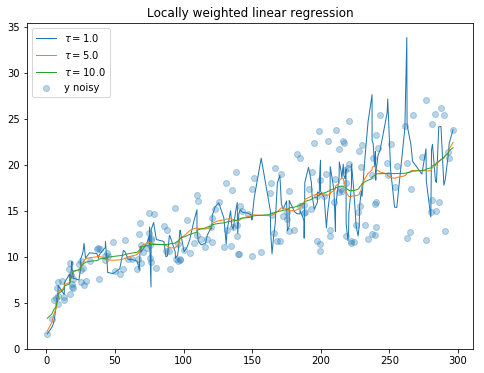

In [9]:
# Implementation in [this page](https://medium.com/100-days-of-algorithms/day-97-locally-weighted-regression-c9cfaff087fb).
def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))

def local_regression(x0, X, Y, tau):
    # add bias term
    x0 = np.r_[1, x0]
    X = np.c_[np.ones(len(X)), X]
    
    # fit model: normal equations with kernel
    xw = X.T * radial_kernel(x0, X, tau)
    theta = np.linalg.pinv(xw @ X) @ xw @ Y
    
    # predict value
    return x0 @ theta

def lwlr(x, y, tau):
    max_x = np.max(x)
    min_x = np.min(x)
    # prediction
    domain = np.linspace(min_x, max_x, num=len(Y))
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
    return prediction

# Initialize data
X = pd.DataFrame(data.X)['X'].values
Y = pd.DataFrame(data.Y)['Y'].values

# Plot the approximation
yest = lwlr(X, Y, tau=5)

plt.figure(figsize=(8,6))
plt.title('Locally weighted linear regression')
plt.scatter(X, Y, label='y noisy', alpha=0.3)
for tau_ in [1., 5., 10.]:
    yest = lwlr(X, Y, tau=tau_)
    plt.plot(X, yest, 
            label=r'$\tau={}$'.format(tau_), lw=1, alpha=1)
plt.legend()
plt.show()